In [68]:
import numpy as np
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
cutoff = int(data.shape[0]*0.8)
train_data = data[:cutoff]
test_data = data[cutoff:]
train_X = train_data[:,:-1].astype(float)
train_Y = train_data[:,-1].reshape(-1,1)
test_X = test_data[:,:-1].astype(float)
test_Y = test_data[:,-1].reshape(-1,1)

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_initial = RandomForestClassifier()
rf_initial.fit(train_X, train_Y.ravel())
print('Train')
rf_initial_predictions = rf_initial.predict(train_X)
print(classification_report(train_Y, rf_initial_predictions, digits=4))
print(accuracy_score(train_Y, rf_initial_predictions))
print()
print('Test')
rf_initial_predictions_test = rf_initial.predict(test_X)
print(classification_report(test_Y, rf_initial_predictions_test, digits=4))
print(accuracy_score(test_Y, rf_initial_predictions_test))

Train
              precision    recall  f1-score   support

          -1     0.9938    0.9849    0.9894      3917
           1     0.9881    0.9951    0.9916      4927

    accuracy                         0.9906      8844
   macro avg     0.9910    0.9900    0.9905      8844
weighted avg     0.9906    0.9906    0.9906      8844

0.9906151062867481

Test
              precision    recall  f1-score   support

          -1     0.9477    0.9235    0.9355       981
           1     0.9402    0.9593    0.9497      1230

    accuracy                         0.9435      2211
   macro avg     0.9440    0.9414    0.9426      2211
weighted avg     0.9435    0.9435    0.9434      2211

0.9434644957033017


In [119]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 400, 700, 1000, 1300, 1700, 2000],
    'max_depth': [None, 20, 40, 60, 80, 100],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = RandomForestClassifier()
rf_grid_cv = GridSearchCV(estimator=rf_grid, param_grid=params, cv=3, verbose=1, n_jobs=-1)
rf_grid_cv.fit(train_X, train_Y.ravel())

Fitting 3 folds for each of 168 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:  7.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [155]:
print('Train')
rf_grid_predictions = rf_grid_cv.predict(train_X)
print(classification_report(train_Y, rf_grid_predictions, digits=4))
print(accuracy_score(train_Y, rf_grid_predictions))
print()
print('Test')
rf_grid_predictions_test = rf_grid_cv.predict(test_X)
print(classification_report(test_Y, rf_grid_predictions_test, digits=4))
print(accuracy_score(test_Y, rf_grid_predictions_test))
print()
print(rf_grid_cv.best_params_)

Train
              precision    recall  f1-score   support

          -1     0.9920    0.9867    0.9894      3917
           1     0.9895    0.9937    0.9916      4927

    accuracy                         0.9906      8844
   macro avg     0.9908    0.9902    0.9905      8844
weighted avg     0.9906    0.9906    0.9906      8844

0.9906151062867481

Test
              precision    recall  f1-score   support

          -1     0.9478    0.9256    0.9366       981
           1     0.9417    0.9593    0.9505      1230

    accuracy                         0.9444      2211
   macro avg     0.9448    0.9425    0.9435      2211
weighted avg     0.9444    0.9444    0.9443      2211

0.9443690637720489

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}


In [125]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [500, 600, 700, 800, 900],
    'max_depth': [None, 120, 140, 160, 180, 200, 220, 240]
}

rf_grid_2 = RandomForestClassifier()
rf_grid_2_cv = GridSearchCV(estimator=rf_grid, param_grid=params, verbose=1, n_jobs=-1)
rf_grid_2_cv.fit(train_X, train_Y.ravel())

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [156]:
print('Train')
rf_grid_2_predictions = rf_grid_2_cv.predict(train_X)
print(classification_report(train_Y, rf_grid_2_predictions, digits=4))
print(accuracy_score(train_Y, rf_grid_2_predictions))
print()
print('Test')
rf_grid_2_predictions_test = rf_grid_2_cv.predict(test_X)
print(classification_report(test_Y, rf_grid_2_predictions_test, digits=4))
print(accuracy_score(test_Y, rf_grid_2_predictions_test))
print()
print(rf_grid_2_cv.best_params_)

Train
              precision    recall  f1-score   support

          -1     0.9948    0.9839    0.9893      3917
           1     0.9873    0.9959    0.9916      4927

    accuracy                         0.9906      8844
   macro avg     0.9911    0.9899    0.9905      8844
weighted avg     0.9907    0.9906    0.9906      8844

0.9906151062867481

Test
              precision    recall  f1-score   support

          -1     0.9459    0.9266    0.9361       981
           1     0.9424    0.9577    0.9500      1230

    accuracy                         0.9439      2211
   macro avg     0.9441    0.9422    0.9431      2211
weighted avg     0.9439    0.9439    0.9439      2211

0.9439167797376753

{'max_depth': None, 'n_estimators': 700}


In [158]:
from sklearn.svm import SVC

svm_initial = SVC()
svm_initial.fit(train_X, train_Y.ravel())
svm_initial_predictions = svm_initial.predict(test_X)
print('Train')
svm_initial_predictions = svm_initial.predict(train_X)
print(classification_report(train_Y, svm_initial_predictions, digits=4))
print(accuracy_score(train_Y, svm_initial_predictions))
print()
print('Test')
svm_initial_predictions_test = svm_initial.predict(test_X)
print(classification_report(test_Y, svm_initial_predictions_test, digits=4))
print(accuracy_score(test_Y, svm_initial_predictions_test))

Train
              precision    recall  f1-score   support

          -1     0.9605    0.9377    0.9490      3917
           1     0.9514    0.9694    0.9603      4927

    accuracy                         0.9553      8844
   macro avg     0.9560    0.9535    0.9546      8844
weighted avg     0.9554    0.9553    0.9553      8844

0.9553369516056083

Test
              precision    recall  f1-score   support

          -1     0.9419    0.9093    0.9253       981
           1     0.9296    0.9553    0.9423      1230

    accuracy                         0.9349      2211
   macro avg     0.9358    0.9323    0.9338      2211
weighted avg     0.9351    0.9349    0.9347      2211

0.9348710990502035


In [143]:
params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['auto', 'scale'],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'probability': [True, False]
}

svm_grid = SVC()
svm_grid_cv = GridSearchCV(estimator=svm_grid, param_grid=params, cv=5, verbose=1, n_jobs=-1)
svm_grid_cv.fit(train_X, train_Y.ravel())

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'poly', 'sigmoid'],
                         'probability': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [159]:
print('Train')
svm_grid_predictions = svm_grid_cv.predict(train_X)
print(classification_report(train_Y, svm_grid_predictions, digits=4))
print(accuracy_score(train_Y, svm_grid_predictions))
print()
print('Test')
svm_grid_predictions_test = svm_grid_cv.predict(test_X)
print(classification_report(test_Y, svm_grid_predictions_test, digits=4))
print(accuracy_score(test_Y, svm_grid_predictions_test))
print()
print(svm_grid_cv.best_params_)

Train
              precision    recall  f1-score   support

          -1     0.9902    0.9778    0.9839      3917
           1     0.9825    0.9923    0.9874      4927

    accuracy                         0.9859      8844
   macro avg     0.9863    0.9850    0.9857      8844
weighted avg     0.9859    0.9859    0.9859      8844

0.9858661239258254

Test
              precision    recall  f1-score   support

          -1     0.9138    0.9297    0.9217       981
           1     0.9431    0.9301    0.9366      1230

    accuracy                         0.9299      2211
   macro avg     0.9285    0.9299    0.9291      2211
weighted avg     0.9301    0.9299    0.9300      2211

0.9298959746720941

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}


In [160]:
from sklearn.neural_network import MLPClassifier

nn_initial = MLPClassifier()
nn_initial.fit(train_X, train_Y.ravel())
nn_initial_predictions = nn_initial.predict(test_X)
print('Train')
nn_initial_predictions = nn_initial.predict(train_X)
print(classification_report(train_Y, nn_initial_predictions, digits=4))
print(accuracy_score(train_Y, nn_initial_predictions))
print()
print('Test')
nn_initial_predictions_test = nn_initial.predict(test_X)
print(classification_report(test_Y, nn_initial_predictions_test, digits=4))
print(accuracy_score(test_Y, nn_initial_predictions_test))

Train
              precision    recall  f1-score   support

          -1     0.9887    0.9847    0.9867      3917
           1     0.9879    0.9911    0.9895      4927

    accuracy                         0.9882      8844
   macro avg     0.9883    0.9879    0.9881      8844
weighted avg     0.9882    0.9882    0.9882      8844

0.9882406151062868

Test
              precision    recall  f1-score   support

          -1     0.9234    0.9337    0.9285       981
           1     0.9467    0.9382    0.9424      1230

    accuracy                         0.9362      2211
   macro avg     0.9350    0.9360    0.9355      2211
weighted avg     0.9363    0.9362    0.9363      2211

0.9362279511533242


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [166]:
params = {
    'hidden_layer_sizes': [(100, 100), (200, 100), (200, 200)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [.001, .0001, .00001]
}

nn_grid = MLPClassifier()
nn_grid_cv = GridSearchCV(estimator=nn_grid, param_grid=params, cv=3, verbose=1, n_jobs=-1)
nn_grid_cv.fit(train_X, train_Y.ravel())

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  8.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['lo

In [167]:
print('Train')
nn_grid_predictions = nn_grid_cv.predict(train_X)
print(classification_report(train_Y, nn_grid_predictions, digits=4))
print(accuracy_score(train_Y, nn_grid_predictions))
print()
print('Test')
nn_grid_predictions_test = nn_grid_cv.predict(test_X)
print(classification_report(test_Y, nn_grid_predictions_test, digits=4))
print(accuracy_score(test_Y, nn_grid_predictions_test))
print()
print(nn_grid_cv.best_params_)

Train
              precision    recall  f1-score   support

          -1     0.9977    0.9770    0.9872      3917
           1     0.9820    0.9982    0.9900      4927

    accuracy                         0.9888      8844
   macro avg     0.9898    0.9876    0.9886      8844
weighted avg     0.9889    0.9888    0.9888      8844

0.9888059701492538

Test
              precision    recall  f1-score   support

          -1     0.9365    0.9174    0.9269       981
           1     0.9352    0.9504    0.9427      1230

    accuracy                         0.9358      2211
   macro avg     0.9359    0.9339    0.9348      2211
weighted avg     0.9358    0.9358    0.9357      2211

0.9357756671189507

{'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (200, 200), 'solver': 'adam'}


In [168]:
params = {
    'hidden_layer_sizes': [(200, 200), (300, 200), (300, 300), (300, 200, 100), (200, 200, 200)],
    'activation': ['tanh'],
    'alpha': [.01, .001, .0001]
}

nn_grid_2 = MLPClassifier()
nn_grid_2_cv = GridSearchCV(estimator=nn_grid, param_grid=params, cv=3, verbose=1, n_jobs=-1)
nn_grid_2_cv.fit(train_X, train_Y.ravel())

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...e, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'a

In [169]:
print('Train')
nn_grid_2_predictions = nn_grid_2_cv.predict(train_X)
print(classification_report(train_Y, nn_grid_2_predictions, digits=4))
print(accuracy_score(train_Y, nn_grid_2_predictions))
print()
print('Test')
nn_grid_2_predictions_test = nn_grid_2_cv.predict(test_X)
print(classification_report(test_Y, nn_grid_2_predictions_test, digits=4))
print(accuracy_score(test_Y, nn_grid_2_predictions_test))
print()
print(nn_grid_2_cv.best_params_)

Train
              precision    recall  f1-score   support

          -1     0.9895    0.9890    0.9893      3917
           1     0.9913    0.9917    0.9915      4927

    accuracy                         0.9905      8844
   macro avg     0.9904    0.9904    0.9904      8844
weighted avg     0.9905    0.9905    0.9905      8844

0.9905020352781547

Test
              precision    recall  f1-score   support

          -1     0.9037    0.9470    0.9248       981
           1     0.9560    0.9195    0.9374      1230

    accuracy                         0.9317      2211
   macro avg     0.9299    0.9333    0.9311      2211
weighted avg     0.9328    0.9317    0.9318      2211

0.9317051108095884

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 200, 200)}


In [163]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_X, train_Y.ravel())

print('Train')
print(lr.score(train_X, train_Y))
print('Test')
print(lr.score(test_X, test_Y))

Train
0.7019712092395985
Test
0.6892029107685065


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Random Forest Mean 0.9678814561167502
Random Forest SD 0.024989996315341143
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]SVM Mean 0.9525070319187966
SVM SD 0.019123903273824107
Iteration 1, loss = 0.24120465
Iteration 2, loss = 0.18200925
Iteration 3, loss = 0.17586293
Iteration 4, loss = 0.17218059
Iteration 5, loss = 0.16501604
Iteration 6, loss = 0.15691085
Iteration 7, loss = 0.14922795
Iteration 8, loss = 0.13619629
Iteration 9, loss = 0.12782733
Iteration 10, loss = 0.11909419
Iteration 11, loss = 0.11317883
Iteration 12, loss = 0.10333327
Iteration 13, loss = 0.10607770
Iteration 14, loss = 0.09692916
Iteration 15, loss = 0.08750523
Iteration 16, loss = 0.08616495
Iteration 17, loss = 0.08510363
Iteration 18, loss = 0.07875078
Iteration 19, loss = 0.07527974
Iteration 20, loss = 0.07285223
Iteration 21, loss = 0.07438090
Iteration 22, loss = 0.06688607
Iteration 23, loss = 0.06538665
Iteration 24, loss = 0.05933328
Iteration 25, loss = 

Iteration 17, loss = 0.10611685
Iteration 18, loss = 0.11255374
Iteration 19, loss = 0.10389954
Iteration 20, loss = 0.10219883
Iteration 21, loss = 0.10162844
Iteration 22, loss = 0.09714285
Iteration 23, loss = 0.10494016
Iteration 24, loss = 0.10470729
Iteration 25, loss = 0.09783039
Iteration 26, loss = 0.09602579
Iteration 27, loss = 0.08921990
Iteration 28, loss = 0.09558918
Iteration 29, loss = 0.09274216
Iteration 30, loss = 0.08296390
Iteration 31, loss = 0.08313953
Iteration 32, loss = 0.07967192
Iteration 33, loss = 0.07793616
Iteration 34, loss = 0.07703297
Iteration 35, loss = 0.07851800
Iteration 36, loss = 0.07664628
Iteration 37, loss = 0.07351682
Iteration 38, loss = 0.06830616
Iteration 39, loss = 0.07010716
Iteration 40, loss = 0.06473889
Iteration 41, loss = 0.06199401
Iteration 42, loss = 0.06201968
Iteration 43, loss = 0.06258843
Iteration 44, loss = 0.06163775
Iteration 45, loss = 0.05465762
Iteration 46, loss = 0.05544248
Iteration 47, loss = 0.05914202
Iteratio

Iteration 108, loss = 0.02708571
Iteration 109, loss = 0.02214026
Iteration 110, loss = 0.02175039
Iteration 111, loss = 0.02025218
Iteration 112, loss = 0.01878002
Iteration 113, loss = 0.02046732
Iteration 114, loss = 0.01876284
Iteration 115, loss = 0.02046773
Iteration 116, loss = 0.01986953
Iteration 117, loss = 0.01820139
Iteration 118, loss = 0.01687713
Iteration 119, loss = 0.01730120
Iteration 120, loss = 0.01743862
Iteration 121, loss = 0.01746716
Iteration 122, loss = 0.01815842
Iteration 123, loss = 0.02043171
Iteration 124, loss = 0.01820549
Iteration 125, loss = 0.02070932
Iteration 126, loss = 0.01756339
Iteration 127, loss = 0.01713947
Iteration 128, loss = 0.01744007
Iteration 129, loss = 0.01830797
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.39159015
Iteration 2, loss = 0.17203303
Iteration 3, loss = 0.13996124
Iteration 4, loss = 0.12742032
Iteration 5, loss = 0.12969323
Iteration 6, loss = 0.1231290

Iteration 93, loss = 0.01930305
Iteration 94, loss = 0.02402541
Iteration 95, loss = 0.02084793
Iteration 96, loss = 0.02217042
Iteration 97, loss = 0.01802786
Iteration 98, loss = 0.01801483
Iteration 99, loss = 0.01835673
Iteration 100, loss = 0.01763527
Iteration 101, loss = 0.01721805
Iteration 102, loss = 0.01632473
Iteration 103, loss = 0.01934302
Iteration 104, loss = 0.01747758
Iteration 105, loss = 0.01775332
Iteration 106, loss = 0.02190488
Iteration 107, loss = 0.01968537
Iteration 108, loss = 0.01708680
Iteration 109, loss = 0.01554010
Iteration 110, loss = 0.01948305
Iteration 111, loss = 0.01703119
Iteration 112, loss = 0.01950441
Iteration 113, loss = 0.02544806
Iteration 114, loss = 0.02034345
Iteration 115, loss = 0.01924641
Iteration 116, loss = 0.02235446
Iteration 117, loss = 0.02662343
Iteration 118, loss = 0.01859015
Iteration 119, loss = 0.01611528
Iteration 120, loss = 0.01516403
Iteration 121, loss = 0.01652318
Iteration 122, loss = 0.01730854
Iteration 123, lo

Iteration 45, loss = 0.05664210
Iteration 46, loss = 0.05721118
Iteration 47, loss = 0.05909870
Iteration 48, loss = 0.05698755
Iteration 49, loss = 0.05758044
Iteration 50, loss = 0.05659822
Iteration 51, loss = 0.05341665
Iteration 52, loss = 0.04826338
Iteration 53, loss = 0.04851421
Iteration 54, loss = 0.05422943
Iteration 55, loss = 0.05596786
Iteration 56, loss = 0.05414824
Iteration 57, loss = 0.05405505
Iteration 58, loss = 0.05379818
Iteration 59, loss = 0.04637641
Iteration 60, loss = 0.04155693
Iteration 61, loss = 0.04024007
Iteration 62, loss = 0.03927691
Iteration 63, loss = 0.03717538
Iteration 64, loss = 0.03984653
Iteration 65, loss = 0.03750131
Iteration 66, loss = 0.03707636
Iteration 67, loss = 0.03737438
Iteration 68, loss = 0.03686825
Iteration 69, loss = 0.03507335
Iteration 70, loss = 0.03601950
Iteration 71, loss = 0.03559694
Iteration 72, loss = 0.03179008
Iteration 73, loss = 0.03186026
Iteration 74, loss = 0.03302766
Iteration 75, loss = 0.03056642
Iteratio

Iteration 42, loss = 0.05842611
Iteration 43, loss = 0.05222711
Iteration 44, loss = 0.05190451
Iteration 45, loss = 0.05101409
Iteration 46, loss = 0.05395181
Iteration 47, loss = 0.04932634
Iteration 48, loss = 0.04733238
Iteration 49, loss = 0.04745631
Iteration 50, loss = 0.04809375
Iteration 51, loss = 0.04870828
Iteration 52, loss = 0.04752567
Iteration 53, loss = 0.04551422
Iteration 54, loss = 0.04054422
Iteration 55, loss = 0.04161597
Iteration 56, loss = 0.03886576
Iteration 57, loss = 0.03711337
Iteration 58, loss = 0.03614875
Iteration 59, loss = 0.03435320
Iteration 60, loss = 0.03497203
Iteration 61, loss = 0.03605724
Iteration 62, loss = 0.03184638
Iteration 63, loss = 0.03188571
Iteration 64, loss = 0.03150199
Iteration 65, loss = 0.03090660
Iteration 66, loss = 0.02955468
Iteration 67, loss = 0.03443622
Iteration 68, loss = 0.03689664
Iteration 69, loss = 0.03857012
Iteration 70, loss = 0.03484123
Iteration 71, loss = 0.03095823
Iteration 72, loss = 0.03046221
Iteratio

Iteration 167, loss = 0.01569491
Iteration 168, loss = 0.01586179
Iteration 169, loss = 0.01514759
Iteration 170, loss = 0.01555517
Iteration 171, loss = 0.01602015
Iteration 172, loss = 0.01522127
Iteration 173, loss = 0.01569252
Iteration 174, loss = 0.02113494
Iteration 175, loss = 0.01701095
Iteration 176, loss = 0.01618638
Iteration 177, loss = 0.01701705
Iteration 178, loss = 0.01755862
Iteration 179, loss = 0.01766345
Iteration 180, loss = 0.01902881
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Neural Network Mean 0.9619991031755738
Neural Network SD 0.02115397201514253


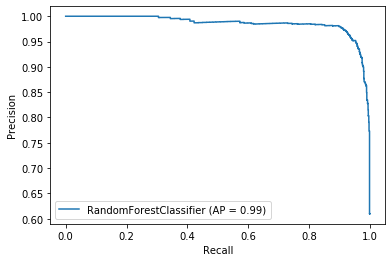

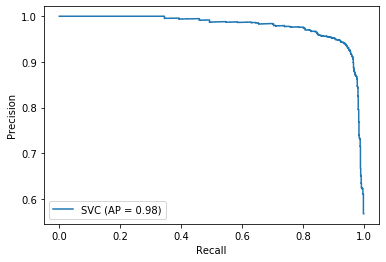

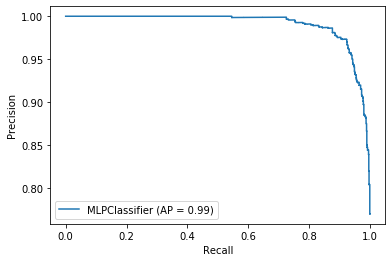

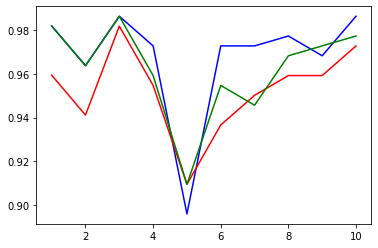

In [183]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

labels = [x for x in range(1, 11)]

rf = RandomForestClassifier(max_depth=None, n_estimators=700, verbose=1)
rf.fit(train_X, train_Y.ravel())
plot_precision_recall_curve(rf, test_X, test_Y.ravel())

rf_kfold = KFold(n_splits=10)
rf_results = cross_val_score(rf, test_X, test_Y.ravel(), cv=rf_kfold, scoring='accuracy')
print('Random Forest Mean', rf_results.mean())
print('Random Forest SD', rf_results.std())

svm = SVC(C=100, gamma='scale', kernel='rbf', probability=True, verbose=1)
svm.fit(train_X, train_Y.ravel())
plot_precision_recall_curve(svm, test_X, test_Y.ravel())

svm_kfold = KFold(n_splits=10)
svm_results = cross_val_score(svm, test_X, test_Y.ravel(), cv=svm_kfold, scoring='accuracy')
print('SVM Mean', svm_results.mean())
print('SVM SD', svm_results.std())

nn = MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes=(200, 200, 200), verbose=1)
nn.fit(train_X, train_Y.ravel())
plot_precision_recall_curve(nn, test_X, test_Y.ravel())

nn_kfold = KFold(n_splits=10)
nn_results = cross_val_score(nn, test_X, test_Y.ravel(), cv=nn_kfold, scoring='accuracy')
print('Neural Network Mean', nn_results.mean())
print('Neural Network SD', nn_results.std())

fig = plt.figure()
plt.plot(labels, rf_results, color='blue')
plt.plot(labels, svd_results, color='red')
plt.plot(labels, nn_results, color='green')
plt.show()